## Performing MuliLinear Regression on 50_startups data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as snf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
profitsdata = pd.read_csv('C:/Users/Anusha/Desktop/ExcelRProjects/dataset/50_Startups.csv')
profitsdata

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### perform initial EDA

In [3]:
# renamin the variable names of R&D Spend and marketing spend
profitsdata = profitsdata.rename({'R&D Spend':'RDSpend'},axis = 1)
profitsdata = profitsdata.rename({'Marketing Spend':'MarketingSpend'},axis =1)
profitsdata = profitsdata.rename({'R&DSpend':'RDSpend'},axis = 1)
profitsdata

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
#check for null values
profitsdata.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

### no null values existing

In [5]:
# check for duplicated rows
profitsdata[profitsdata.duplicated()]

,RDSpend,Administration,MarketingSpend,State,Profit


<AxesSubplot:>

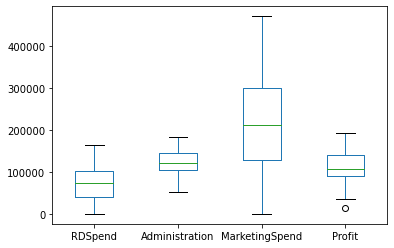

In [6]:
# check for outliers
profitsdata.plot(kind = 'box')

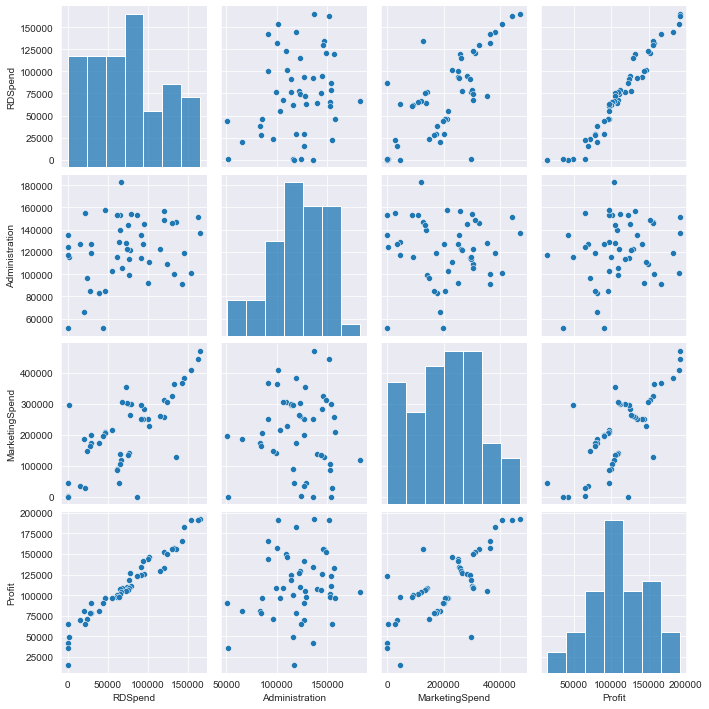

In [7]:
# check for relationship b/w variables
sns.set_style(style = "darkgrid")
sns.pairplot(profitsdata)

In [8]:
#strength of the relationship
profitsdata.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Assumptions

#### there should be no collinearity b/w input variables
#### to eliminate collinearity we can use backword elimination as a feature selecting method
#### for this 
#### step1: build basic model using all the variables

In [9]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data = profitsdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 08 May 2021   Prob (F-statistic):           4.53e-30
Time:                        22:06:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### from the above model we can conclude Administration and Marketing Spend are not significant as p>0.05

### Build Simple Linear Regression models to eliminate a variable

In [10]:
# To eliminate one of this 2 variables lets build models for profit~ Andministrator and profit~MarketingSpend
#model building using profit v/s Adminstrartor
import statsmodels.formula.api as smf
model_administration = smf.ols('Profit~Administration',data = profitsdata).fit()
model_administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 08 May 2021   Prob (F-statistic):              0.162
Time:                        22:06:46   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#model building using profit v/s MarketingSpend 
import statsmodels.formula.api as smf
model_MarketingSpeed = smf.ols('Profit~MarketingSpend',data=profitsdata).fit()
model_MarketingSpeed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 08 May 2021   Prob (F-statistic):           4.38e-10
Time:                        22:06:46   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### To conclude whether to remove any variable we check the VIF(Variance Inflation factor) of a variable
###### It measures the degree of collinearity
###### If VIF value is greater than 10 in the model all the vriables are involved in colinearity

In [12]:
# building models to caluclate VIF values for each variables
rsq_RDSpend = smf.ols('RDSpend~Administration+MarketingSpend',data=profitsdata).fit().rsquared
vif_RDSpend= 1/(1-rsq_RDSpend)

rsq_Administration = smf.ols('Administration~RDSpend+MarketingSpend',data=profitsdata).fit().rsquared
vif_Administration= 1/(1-rsq_Administration)

rsq_MarketingSpend = smf.ols('MarketingSpend~RDSpend+Administration',data=profitsdata).fit().rsquared
vif_MarketingSpend= 1/(1-rsq_MarketingSpend)

VIF_table = {'Features':['RDSpend','Administration','MarketingSpend'],
             'VIF_Values':[vif_RDSpend,vif_Administration,vif_MarketingSpend]}
VIF_table= pd.DataFrame(VIF_table)
VIF_table

,Features,VIF_Values
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


In [13]:
# We can get a 3rd opinion using partial regression plot

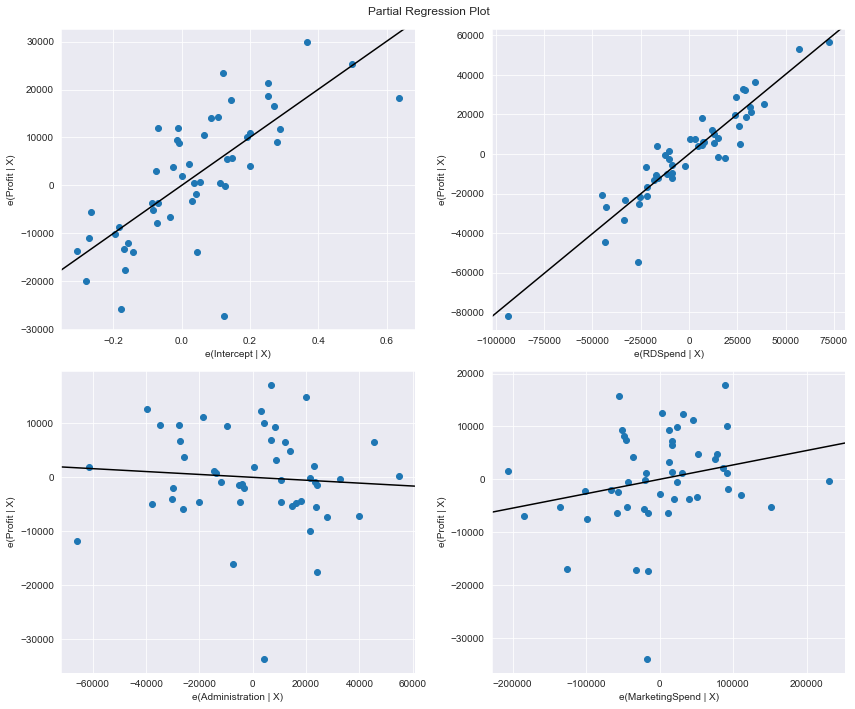

In [14]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
fig=sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

In [15]:
import statsmodels.formula.api as smf
model_Inc_Market = smf.ols('Profit~RDSpend+MarketingSpend',data = profitsdata).fit()
model_Inc_Market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 08 May 2021   Prob (F-statistic):           2.16e-31
Time:                        22:06:50   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDSpend            0.7966      0.041     19.266      0.000       0.713       0.880
MarketingSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

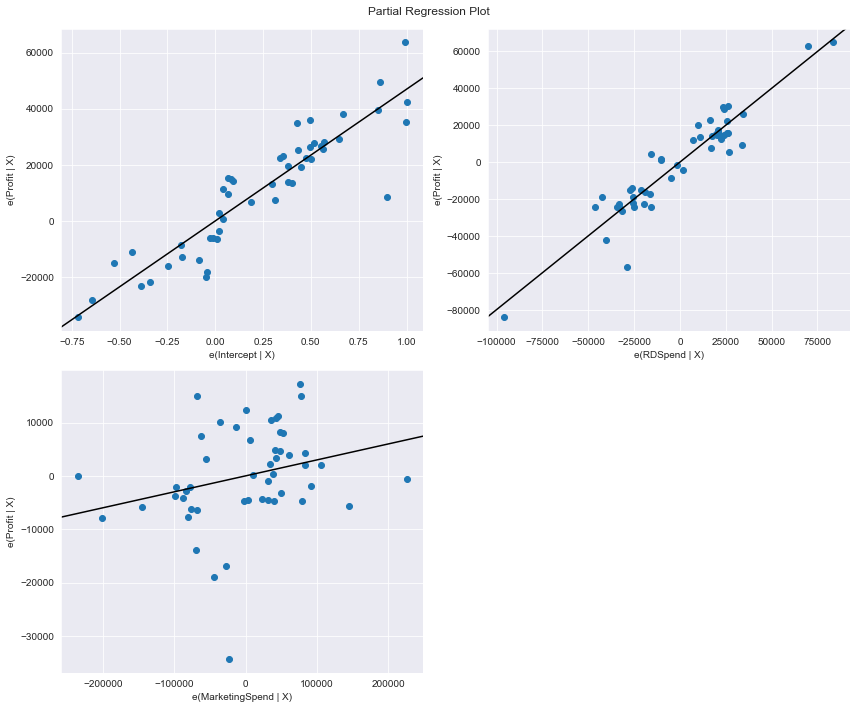

In [16]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
fig=sm.graphics.plot_partregress_grid(model_Inc_Market,fig=fig)
plt.show()

In [17]:
import statsmodels.formula.api as smf
model_Inc_Admin = smf.ols('Profit~RDSpend+Administration',data = profitsdata).fit()
model_Inc_Admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sat, 08 May 2021   Prob (F-statistic):           7.29e-31
Time:                        22:06:51   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RDSpend            0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

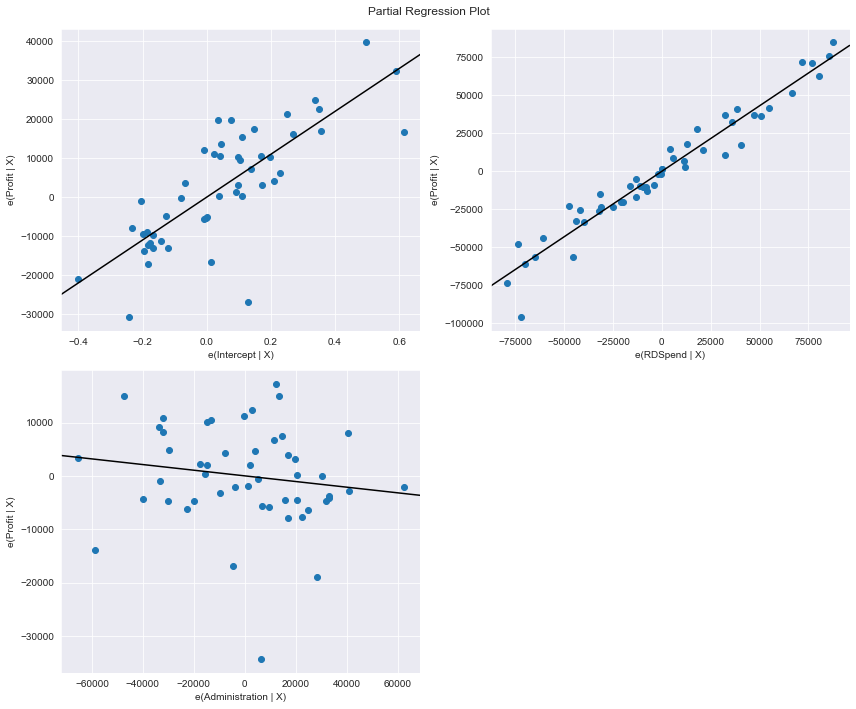

In [18]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
fig=sm.graphics.plot_partregress_grid(model_Inc_Admin,fig=fig)
plt.show()

###### From the Above VIF and Partialplot regressions we can conclude that 
###### no variables are highly involved in collinearity problem
###### so we can consider all the three variables for model building

### Identifing Influencial observations using basic model


In [19]:
# identifing influencial observations
model_influence= model.get_influence()
(c,_)=model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distances')

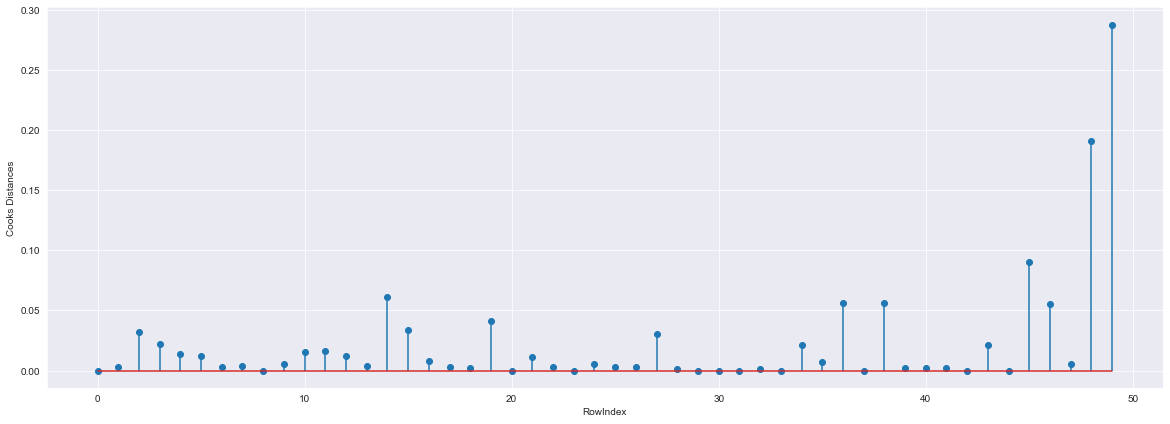

In [20]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(profitsdata)),np.round(c,3))
plt.xlabel('RowIndex')
plt.ylabel('Cooks Distances')

In [21]:
# get index and values of influencer where c value is more than 0.5
# argmax gives the index value and max gives the maximum cooks distance value
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

###### from the cooks distance we can conclude there is no influencer observation in the basic model

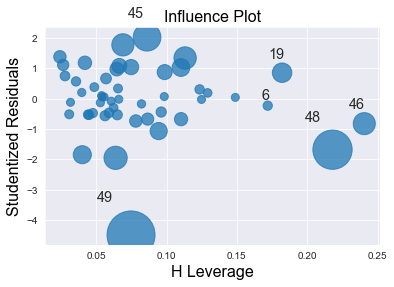

In [22]:
## The same can be concluded using influence index plot using H leverage
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [23]:
# H Leveerage Threshold value
k = profitsdata.shape[1] # no. of columns
n=profitsdata.shape[0]  #no. of rows
lev=3*((k+1)/n)
print("The threshold value for hvalue of the model: ",lev)

The threshold value for hvalue of the model:  0.36


###### Any value greater than the  threshold can be considered as influncial, but we can see from the influencial index plot there is no datapoint which exceeds the threshold

## Residual Analysis

#### Test for normality of residuals

In [24]:
# checkin assumptions for errors
# model.resid gives the error values i.e actual - predicted
resid=model.resid

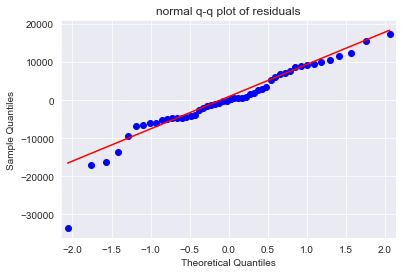

In [25]:
import statsmodels.api as sm
qqplot=sm.qqplot(resid,line='q')# line=45 to draw diognal value
plt.title("normal q-q plot of residuals")
plt.show()

###### If most of the datapoints fall on the line the we can say errors as normally distributed

mean of the errors 7.625203579664231e-11


(array([ 1.,  0.,  0.,  3.,  1., 12., 15.,  6.,  9.,  3.]),
 array([-33533.7341113 , -28452.81766886, -23371.90122642, -18290.98478398,
        -13210.06834154,  -8129.1518991 ,  -3048.23545666,   2032.68098578,
          7113.59742822,  12194.51387065,  17275.43031309]),
 <BarContainer object of 10 artists>)

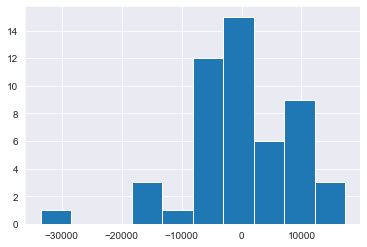

In [26]:
# find whether the mean of the errors should be zero
print("mean of the errors",resid.mean())
plt.hist(resid)

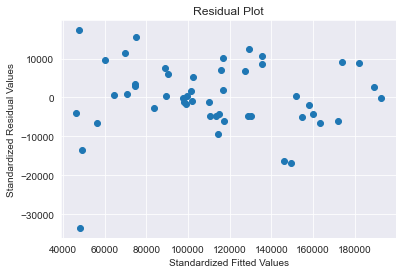

In [27]:
# Errors should not follow any pattern they should be independent of eachother
# That can be checked using Residual plot for homoscedasticity
model.fittedvalues # it gives us the predicted values

plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [28]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

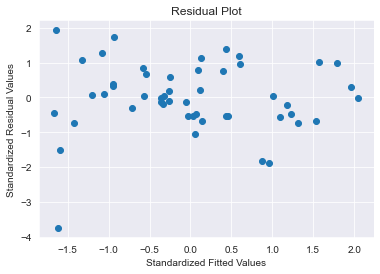

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

###### Errors are normally distributed and show homoskedasticity

In [30]:
# As we know correlation strength Administration is contributing less compared to other variables in model building
# Built transformed models to check if the accuracy of the model can be  improved
profitsdata['log_Administration']=np.log(profitsdata['Administration'])
profitsdata.head(2)

,RDSpend,Administration,MarketingSpend,State,Profit,log_Administration
0,165349.2,136897.80,471784.10,New York,192261.83,11.826990
1,162597.7,151377.59,443898.53,California,191792.06,11.927533


### building Transformation models

In [31]:
# building Log Transformation models
import statsmodels.formula.api as smf
model_log_Admin = smf.ols('Profit~RDSpend+MarketingSpend+log_Administration',data = profitsdata).fit()
model_log_Admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     295.2
Date:                Sat, 08 May 2021   Prob (F-statistic):           4.79e-30
Time:                        22:07:03   Log-Likelihood:                -525.45
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.196e+04   6.21e+04      1.159      0.252    -5.3e+04    1.97e+05
RDSpend                0.8032      0.045     17.900      0.000       0.713       0.894
MarketingSpend         0.0282      0.016      1.737      0.089      -0.004       0.061
log_Administration -2150.6645   5339.063     -0.403      0.689   -1.29e+04    8596.311
==============================================================================
Omnibus:                       14.516   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.693
Skew:                          -0.934   Prob(JB):                     3.21e-05
Kurtosis:                       5.538   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

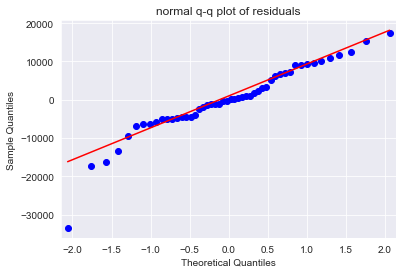

In [32]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_log_Admin.resid,line='q')# line=45 to draw diognal value
plt.title("normal q-q plot of residuals")
plt.show()

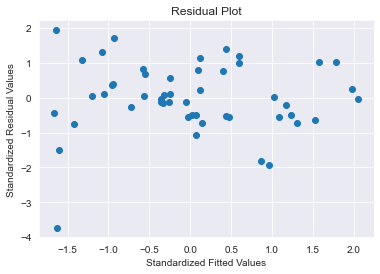

In [33]:
plt.scatter(get_standardized_values(model_log_Admin.fittedvalues),get_standardized_values(model_log_Admin.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

###### From different parameters like R-squared,adj-rsquared,AIC,BIC,different residual plots we can conclude basic model and Log model are performing almost similar

#### Building An exponential model to check if the accuracy can be improved

In [34]:
# building exponential model
import statsmodels.formula.api as smf
model_exp = smf.ols('np.log(Profit)~RDSpend+MarketingSpend+Administration',data = profitsdata).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     49.02
Date:                Sat, 08 May 2021   Prob (F-statistic):           2.28e-14
Time:                        22:07:06   Log-Likelihood:                 3.9014
No. Observations:                  50   AIC:                            0.1972
Df Residuals:                      46   BIC:                             7.845
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8383      0.166     65.249      0.000      10.504      11.173
RDSpend         8.122e-06   1.14e-06      7.118      0.000    5.83e-06    1.04e-05
MarketingSpend  3.214e-07   4.16e-07      0.773      0.443   -5.15e-07    1.16e-06
Administration  3.083e-07   1.29e-06      0.239      0.812   -2.29e-06     2.9e-06
==============================================================================
Omnibus:                       74.731   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.557
Skew:                          -3.913   Prob(JB):                    4.26e-204
Kurtosis:                      22.705   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

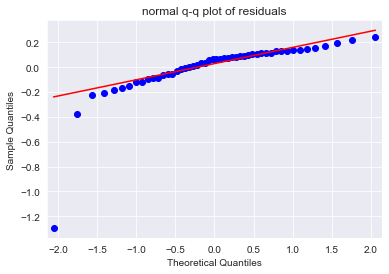

In [35]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_exp.resid,line='q')# line=45 to draw diognal value
plt.title("normal q-q plot of residuals")
plt.show()

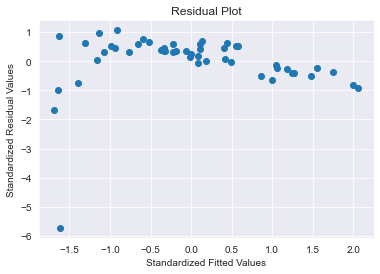

In [36]:
plt.scatter(get_standardized_values(model_exp.fittedvalues),get_standardized_values(model_exp.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

###### Even for exponential model from different parameters like R-squared,adj-rsquared,AIC,BIC,different residual plots we can conclude exponential model doesn't suit for the gievn dataset

In [37]:
#Predicting for new Data

In [38]:
profitsdata.head()

,RDSpend,Administration,MarketingSpend,State,Profit,log_Administration
0,165349.20,136897.80,471784.10,New York,192261.83,11.826990
1,162597.70,151377.59,443898.53,California,191792.06,11.927533
2,153441.51,101145.55,407934.54,Florida,191050.39,11.524316
3,144372.41,118671.85,383199.62,New York,182901.99,11.684117
4,142107.34,91391.77,366168.42,Florida,166187.94,11.422911


In [39]:
new_data=pd.DataFrame({'RDSpend':153441.51,'Administration':101145.55,'MarketingSpend':407934.54},index=[1])
new_data

,RDSpend,Administration,MarketingSpend
1,153441.51,101145.55,407934.54


In [40]:
model.predict(new_data)

1    182147.279096
dtype: float64

## Evaluating the model using cross validation

In [41]:
# split the data into train and test
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(profitsdata,test_size=0.2)

In [42]:
train_data

,RDSpend,Administration,MarketingSpend,State,Profit,log_Administration
41,27892.92,84710.77,164470.71,Florida,77798.83,11.346998
18,91749.16,114175.79,294919.57,Florida,124266.90,11.645495
47,0.00,135426.92,0.00,California,42559.73,11.816187
6,134615.46,147198.87,127716.82,California,156122.51,11.899540
48,542.05,51743.15,0.00,New York,35673.41,10.854047
42,23640.93,96189.63,148001.11,California,71498.49,11.474077
33,55493.95,103057.49,214634.81,Florida,96778.92,11.543042
0,165349.20,136897.80,471784.10,New York,192261.83,11.826990
5,131876.90,99814.71,362861.36,New York,156991.12,11.511071
4,142107.34,91391.77,366168.42,Florida,166187.94,11.422911


In [43]:
test_data

,RDSpend,Administration,MarketingSpend,State,Profit,log_Administration
35,46014.02,85047.44,205517.64,New York,96479.51,11.350964
22,73994.56,122782.75,303319.26,Florida,110352.25,11.718172
17,94657.16,145077.58,282574.31,New York,125370.37,11.885024
7,130298.13,145530.06,323876.68,Florida,155752.60,11.888138
40,28754.33,118546.05,172795.67,California,78239.91,11.683057
1,162597.70,151377.59,443898.53,California,191792.06,11.927533
14,119943.24,156547.42,256512.92,Florida,132602.65,11.961114
46,1315.46,115816.21,297114.46,Florida,49490.75,11.659760
10,101913.08,110594.11,229160.95,Florida,146121.95,11.613622
2,153441.51,101145.55,407934.54,Florida,191050.39,11.524316


In [44]:
# Define RMSE - sqrt of mean square errors
# as rmse is scale dependent 
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [45]:
#define MAPE -Mean Absolute percentage error
# Mape is scale free which gives accuate insights about the goodness of the model
def MAPE(pred,actual):
    return np.mean(abs(pred-actual)/actual)*100

### Train the model using training data - Using Basic Model

In [46]:
train_model=smf.ols('Profit~RDSpend+MarketingSpend+Administration',data = train_data).fit()
train_yhat=train_model.predict(train_data)
train_y = train_data.Profit
Rmse_train_basic=RMSE(train_yhat,train_y)
round(Rmse_train_basic,4)
Mape_train_basic=MAPE(train_yhat,train_y)
print(round(Rmse_train_basic,4),round(Mape_train_basic,4))

8959.1855 11.6979


### Test the model using testing data -For Basic Model

In [47]:
predtest=train_model.predict(test_data)
actualtest=test_data.Profit
Rmse_test_basic=RMSE(predtest,actualtest)
Mape_test_basic=MAPE(predtest,actualtest)
print(round(Rmse_test_basic,4),round(Mape_test_basic,4))

8954.5168 7.0188


In [48]:
### Train the model using training data - Log Transformation Model

In [49]:
train_model=smf.ols('Profit~RDSpend+MarketingSpend+log_Administration',data = train_data).fit()
train_yhat=train_model.predict(train_data)
train_y = train_data.Profit
Rmse_train_log=RMSE(train_yhat,train_y)
round(Rmse_train_log,4)
Mape_train_log=MAPE(train_yhat,train_y)
print(round(Rmse_train_log,4),round(Mape_train_log,4))

8958.666 11.6953


In [50]:
### Test the model using testing data -Using log Model

In [51]:
predtest=train_model.predict(test_data)
actualtest=test_data.Profit
Rmse_test_log=RMSE(predtest,actualtest)
Mape_test_log=MAPE(predtest,actualtest)
print(round(Rmse_test_log,4),round(Mape_test_log,4))

8906.0933 6.9955


In [52]:
### Train the model using training data - Using exponential Model

In [53]:
train_model=smf.ols('np.log(Profit)~RDSpend+MarketingSpend+Administration',data = train_data).fit()
train_yhat=np.exp(train_model.predict(train_data))
train_y = train_data.Profit
Rmse_train_exp=RMSE(train_yhat,train_y)
round(Rmse_train_exp,4)
Mape_train_exp=MAPE(train_yhat,train_y)
print(round(Rmse_train_exp,4),round(Mape_train_exp,4))

16288.3269 17.4628


In [54]:
### Test the model using testing data -Using exponential Model

In [55]:
predtest=np.exp(train_model.predict(test_data))
actualtest=test_data.Profit
Rmse_test_exp=RMSE(predtest,actualtest)
Mape_test_exp=MAPE(predtest,actualtest)
print(round(Rmse_test_exp,4),round(Mape_test_exp,4))

23678.6337 14.0825


In [57]:
# Table containing R squared values for each model
model_comarision_table = pd.DataFrame({'model':['Basic_model','Log_model','Exponential_model'],
                                      'RSquared':[model.rsquared,model_log_Admin.rsquared,model_exp.rsquared],
                                      'AIC':[model.aic,model_log_Admin.aic,model_exp.aic],
                                      'Train_RMSE':[Rmse_train_basic,Rmse_train_log,Rmse_train_exp],
                                      'Test_RMSE':[Rmse_test_basic,Rmse_test_log,Rmse_test_exp],
                                      'MAPE_Train':[Mape_train_basic,Mape_train_log,Mape_train_exp],
                                      'MAPE_Test':[Mape_test_basic,Mape_test_log,Mape_test_exp]})
model_comarision_table

,model,RSquared,AIC,Train_RMSE,Test_RMSE,MAPE_Train,MAPE_Test
0,Basic_model,0.950746,1058.771499,8959.185539,8954.516848,11.697931,7.018823
1,Log_model,0.950624,1058.894711,8958.666025,8906.093303,11.695268,6.995491
2,Exponential_model,0.761719,0.197226,16288.326926,23678.633695,17.462773,14.082535


# Conclustion

###### Even From Cross Validation We can conclude  that log model an basic model are perorming almost similar, In order to avoid any overfitting problems we can choose basic model for given data set which is just right fit , as there is no much improvement in the accuracy with transformations , exponention model is not performing will for the given dataset as it is having higher rmse mape rsquared etc..